In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tr = pd.read_csv('data/trlatest.csv', encoding='utf-8')

In [4]:
tr.head()

,아파트/계,다세대주택/계,연립주택/계,비거주건물내주택/계,단독주택/계,20~30대 1인가구/전체가구,쓰레기 비용 주민부담률,자치구 청소예산 재정자립도,1인가구수,주민수,생활폐기물 재활용율
0,0.335,0.117,0.268,0.019,0.262,0.195,0.675,0.563,12346,63414,0.508578
1,0.618,0.046,0.174,0.021,0.141,0.184,0.661,0.475,10155,55093,0.418840
2,0.505,0.053,0.243,0.010,0.189,0.188,0.675,0.525,17969,95714,0.545222
3,0.740,0.022,0.111,0.012,0.115,0.169,0.661,0.738,20619,122186,0.598687
4,0.358,0.045,0.410,0.016,0.171,0.232,0.595,0.519,35215,152090,0.662907


In [5]:
tr.corr()

,아파트/계,다세대주택/계,연립주택/계,비거주건물내주택/계,단독주택/계,20~30대 1인가구/전체가구,쓰레기 비용 주민부담률,자치구 청소예산 재정자립도,1인가구수,주민수,생활폐기물 재활용율
아파트/계,1.000000,-0.645345,-0.820886,-0.404088,-0.691838,-0.305234,0.195342,0.113020,-0.111187,0.226544,-0.448798
다세대주택/계,-0.645345,1.000000,0.247497,0.438464,0.683242,0.216180,-0.088383,-0.204355,-0.160561,-0.539215,0.030197
연립주택/계,-0.820886,0.247497,1.000000,-0.017843,0.170169,0.074442,-0.307051,0.087347,0.181905,0.167126,0.347886
비거주건물내주택/계,-0.404088,0.438464,-0.017843,1.000000,0.715416,0.545200,0.351225,-0.177572,0.102159,-0.490350,0.226350
단독주택/계,-0.691838,0.683242,0.170169,0.715416,1.000000,0.454533,0.052466,-0.310707,0.006727,-0.558157,0.430681
20~30대 1인가구/전체가구,-0.305234,0.216180,0.074442,0.545200,0.454533,1.000000,0.011139,-0.054903,0.766448,0.053942,0.316177
쓰레기 비용 주민부담률,0.195342,-0.088383,-0.307051,0.351225,0.052466,0.011139,1.000000,0.360726,-0.061533,-0.064955,0.041060
자치구 청소예산 재정자립도,0.113020,-0.204355,0.087347,-0.177572,-0.310707,-0.054903,0.360726,1.000000,0.024041,0.194450,-0.003500
1인가구수,-0.111187,-0.160561,0.181905,0.102159,0.006727,0.766448,-0.061533,0.024041,1.000000,0.658394,0.339483
주민수,0.226544,-0.539215,0.167126,-0.490350,-0.558157,0.053942,-0.064955,0.194450,0.658394,1.000000,0.135674


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [7]:
age = pd.read_csv('data/2019age.csv')

In [10]:
age.head()

,20,30,40,50,60,70,80,re
0,7442,4904,3259,3356,3064,2264,1296,0.508578
1,5482,4673,2993,3080,3001,2016,1138,0.418840
2,8309,9660,5532,4374,3877,2784,1888,0.545222
3,11902,8717,5654,5348,5020,3348,1843,0.598687
4,20532,14683,7568,7110,6296,3768,1782,0.662907


In [11]:
data = age.iloc[:, :7]
target = age.iloc[:, 7]

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, test_size=0.3, random_state=2111081305)

In [17]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [18]:
print(lrclf.coef_, '%.2f' % lrclf.intercept_)

[ 1.27307965e-05 -2.36196930e-05  9.73259274e-06  3.27032402e-05
  1.54195962e-05 -2.46723781e-05 -6.37056346e-05] 0.51


In [19]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

0.11 -0.05


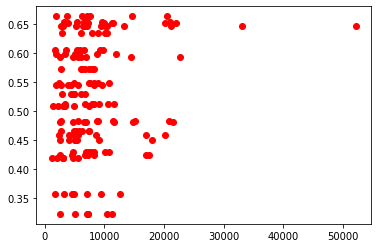

In [22]:
plt.plot(data, target, 'ro')

In [27]:
lrclf = LinearRegression()
lrclf.fit(data,target)

LinearRegression()

In [28]:
lrclf.coef_, lrclf.intercept_

(array([ 1.34670641e-05, -2.80842900e-05,  3.59167828e-05,  5.32050161e-06,
         6.95884468e-05, -1.11316486e-04,  1.54445137e-05]),
 0.39908242491923007)

In [23]:
age.corr()

,20,30,40,50,60,70,80,re
20,1.000000,0.802511,0.648035,0.445395,0.278410,0.294008,0.237325,0.409437
30,0.802511,1.000000,0.932576,0.601729,0.416757,0.335783,0.256946,0.196095
40,0.648035,0.932576,1.000000,0.768651,0.641457,0.564203,0.471858,0.179621
50,0.445395,0.601729,0.768651,1.000000,0.937601,0.823568,0.676529,0.387705
60,0.278410,0.416757,0.641457,0.937601,1.000000,0.939241,0.838870,0.309401
70,0.294008,0.335783,0.564203,0.823568,0.939241,1.000000,0.953613,0.214120
80,0.237325,0.256946,0.471858,0.676529,0.838870,0.953613,1.000000,0.116663
re,0.409437,0.196095,0.179621,0.387705,0.309401,0.214120,0.116663,1.000000


In [25]:
import seaborn as sns

<AxesSubplot:>

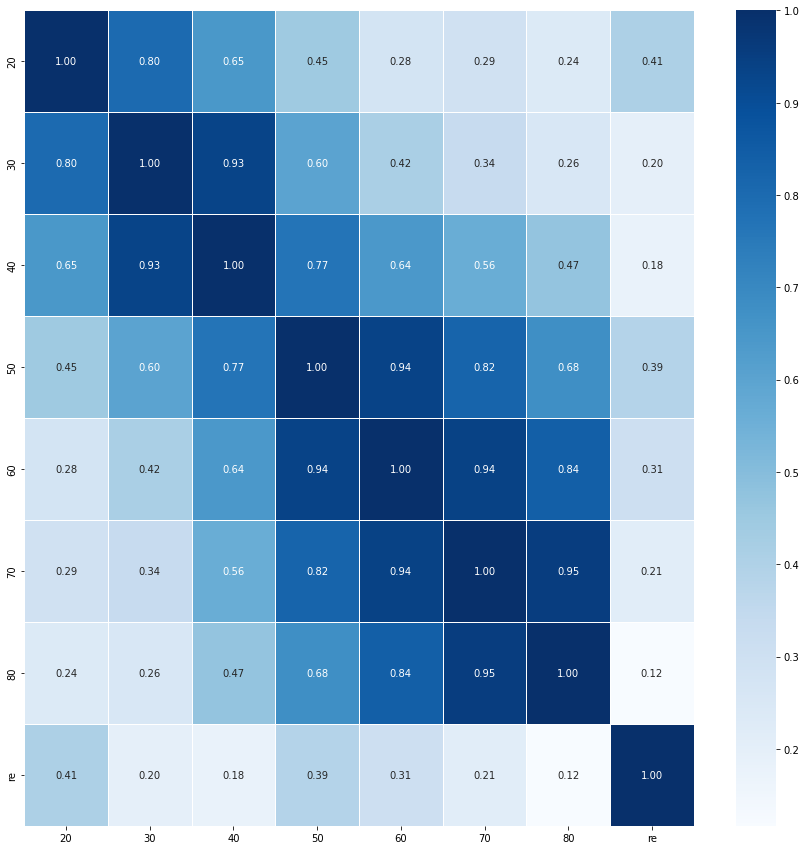

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(data = age.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [77]:
data1 = age.iloc[:, 0]
target1 = age.iloc[:, 7]
data1 =  np.array(data1).reshape(-1,1)

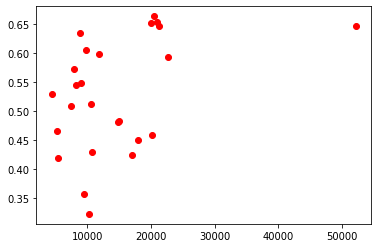

In [43]:
plt.plot(data1, target1, 'ro')

In [44]:
lrclf = LinearRegression()
lrclf.fit(data1,target1)

LinearRegression()

In [45]:
lrclf.coef_, lrclf.intercept_

(array([4.12871274e-06]), 0.46789943077138785)

In [47]:
z = lrclf.predict(data1)

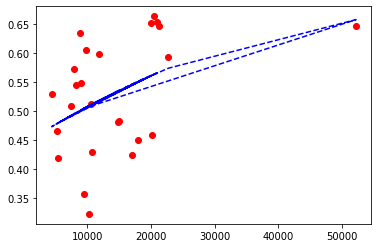

In [70]:
plt.plot(data1, target1, 'ro')
plt.plot(data1, z, 'b--')

In [50]:
rmse = np.sqrt(mean_squared_error(target, z))
r2 = r2_score(target, z)
print(rmse, '%.2f' % r2)

0.08742210664277639 0.17


In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
pf = PolynomialFeatures(degree=2, include_bias=False)

In [54]:
X_poly = pf.fit_transform(data1)

In [56]:
plr = LinearRegression()
plr.fit(X_poly, target)

LinearRegression()

In [64]:
np.set_printoptions(precision = 5, suppress=True)
plr.coef_, plr.intercept_

(array([ 0.00001, -0.     ]), 0.4429883718330571)

In [65]:
z = plr.predict(X_poly)

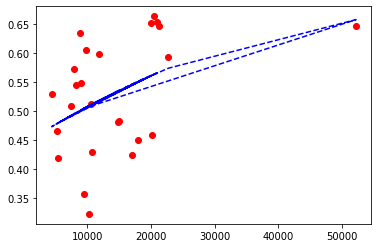

In [66]:
plt.plot(data1, target, 'ro')
plt.plot(data1, z, 'b--')

In [67]:
X_poly[:3]

array([[    7442., 55383364.],
       [    5482., 30052324.],
       [    8309., 69039481.]])

In [72]:
import numpy as np

In [83]:
data1 = age.iloc[:, 0]
target1 = age.iloc[:, 7]

In [84]:
Modelpoly = np.poly1d(np.polyfit(data1, target, 3))

In [85]:
Linepoly = np.linspace(1, 55000, 1)

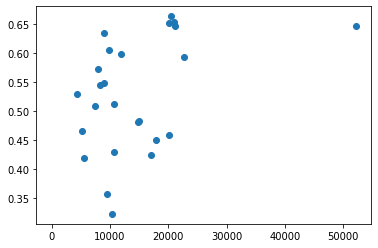

In [86]:
plt.scatter(data1, target1)
plt.plot(Linepoly, Modelpoly(Linepoly))
plt.show()

In [87]:
target1.describe()

count    25.000000
mean      0.527767
std       0.097798
min       0.322735
25%       0.458910
50%       0.529902
75%       0.604371
max       0.662907
Name: re, dtype: float64

0     0.508578
1     0.418840
2     0.545222
3     0.598687
4     0.662907
5     0.645729
6     0.633947
7     0.653512
8     0.572635
9     0.529902
10    0.428497
11    0.511360
12    0.449735
13    0.458910
14    0.465741
15    0.651184
16    0.322735
17    0.604371
18    0.423826
19    0.593076
20    0.646185
21    0.357255
22    0.480769
23    0.483100
24    0.547469
Name: re, dtype: float64